Packages:
1. statsmodels:  statsmodels.tsa.stattools
   --> ploting ACF & PACF, dickey-fuller-test
2. pytrends= for getting google trend using payload(contain info.)
3. matplotlib.pyplot= for ploting graphs

In [1]:
!pip install PyDrive

In [0]:
#Installing required packages
import pandas as pd
import datetime as dt
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [0]:
#Conecting google drive to google co-lab
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#LOADING CSV FILE FROM GOOGLE DRIVE

link = 'https://drive.google.com/open?id=1TVgbPXsvMr7BzvweArubPcR5AHSa_zw9'
fluff, id = link.split('=')  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ToteBag_2004_19.csv.csv')
data_x=pd.read_csv('ToteBag_2004_19.csv.csv',encoding='latin-1')
time_data=data_x.loc[:, ~data_x.columns.str.contains('^Unnamed')]
time_data.rename(columns={'tote bag: (United States)': 'Volume'}, inplace=True)
print(time_data.head())

     Month  Volume
0  2004-01      35
1  2004-02      29
2  2004-03      33
3  2004-04      33
4  2004-05      30


Manual-for-Google-Trend:  https://pypi.org/project/pytrends/#interest-over-time

In [5]:
#Getting data from Google trend API
!pip install pytrends

1. gprop: images, news, youtube or froogle
2. geo: 'US-AL', 'GB-ENG', 'US'
3. cat: "https://www.google.com/trends/explore#q=pizza&cat=71"     so cat='71'
4. kw_list: contain the Keyword or list of Keywords max =5
5. timeframe: 'today 5-y', 'all', '2016-12-14 2017-01-25' (Specific date),

In [6]:
#API to fetch the search volume of a specific "keyword" using Google trend
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

#Building the Payload
# kw_list = ['Apparel', 'Redwear', 'Caps', 'Sunglasses']
kw_list = ['tote bag']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
time_data=pytrends.interest_over_time()
time_data.head(8)
# df=pytrends.get_historical_interest(kw_list, year_start=2015, month_start=1, year_end=2018, month_end=12, cat=0, geo='US', gprop='', sleep=0)

,tote bag,isPartial
date,,
2014-09-21,60,False
2014-09-28,58,False
2014-10-05,55,False
2014-10-12,51,False
2014-10-19,56,False
2014-10-26,49,False
2014-11-02,56,False
2014-11-09,56,False


**1. Building Time Series Object**

In [0]:
time_data=pd.DataFrame(time_data['tote bag'].resample('MS').mean())

In [0]:
# time_data.set_index("Month", inplace = True, drop=True)
# time_data=time_data[['tote bag']]
time_data.rename(columns={'tote bag': 'Volume'}, inplace=True)
time_data=time_data.loc['2015-01-01':'2019-08-01']

In [0]:
ts=time_data.copy()

In [10]:
ts.head(5)

,Volume
date,
2015-01-01,60.50
2015-02-01,55.75
2015-03-01,58.80
2015-04-01,62.50
2015-05-01,61.20


1. Visually check for trends, i.e mean and Variance changing over time

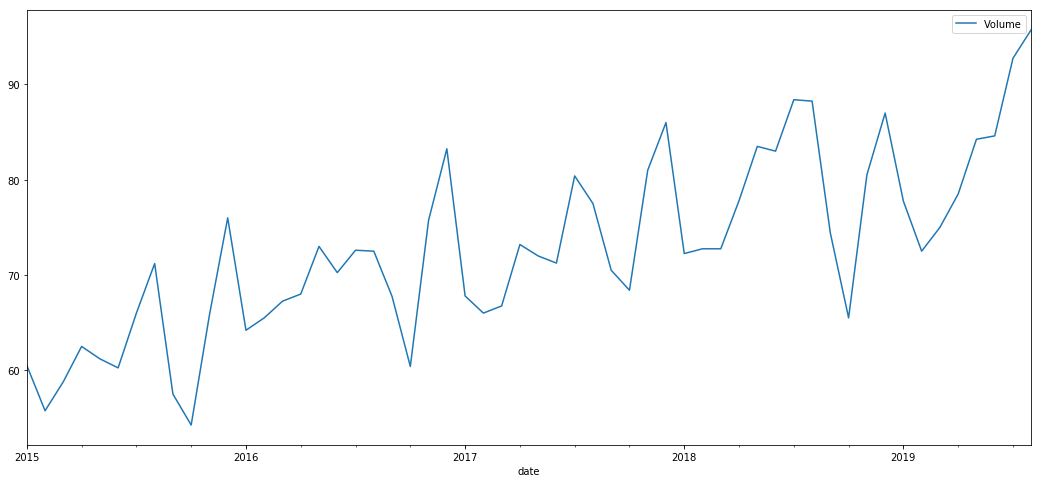

In [11]:
# Ploting 5 year data
import matplotlib.pyplot as plt 
import numpy as np 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
ts.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5bbe6b198>]],
      dtype=object)

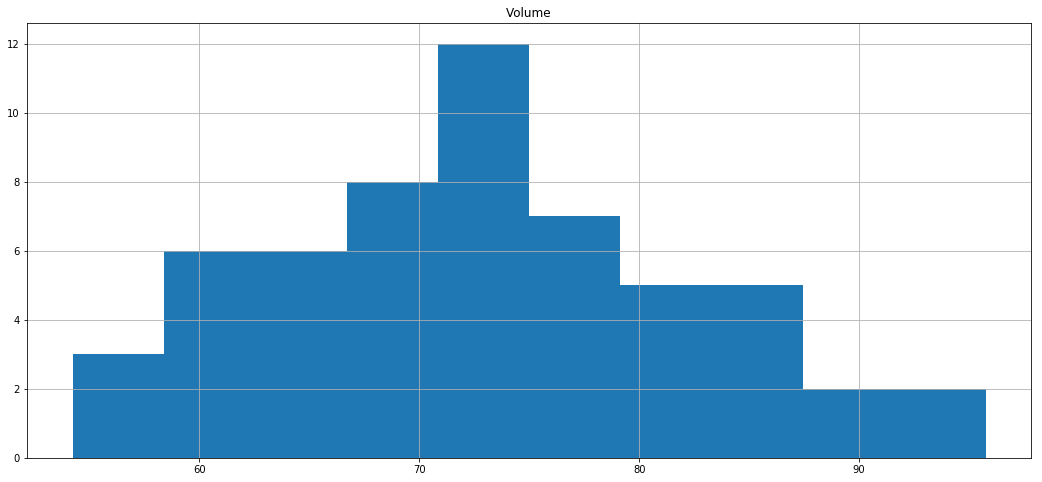

In [12]:
#If not a bell shaped, its not statinary
time_data.hist()

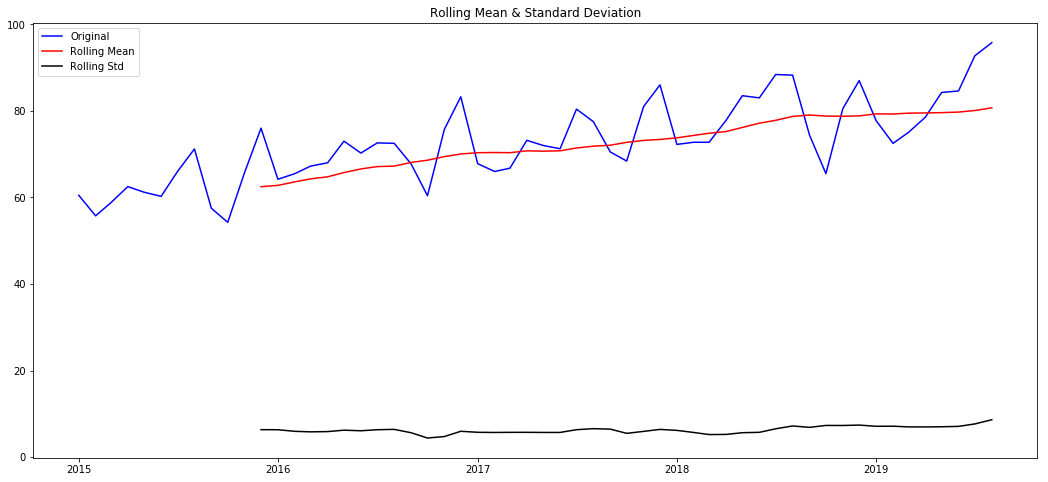

In [13]:
#1. Checking startionarity
#Determing rolling statistics
rolmean= ts.rolling(window=12).mean()
rolstd= ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [0]:
# one, two, three = np.split(time_data['Volume'].sample(frac=1), [int(.25*len(time_data['Volume'])), int(.75*len(time_data['Volume']))])

# mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
# var1, var2, var3 = one.var(), two.var(), three.var()
 
# print(mean1, mean2, mean3)
# print(var1, var2, var3)

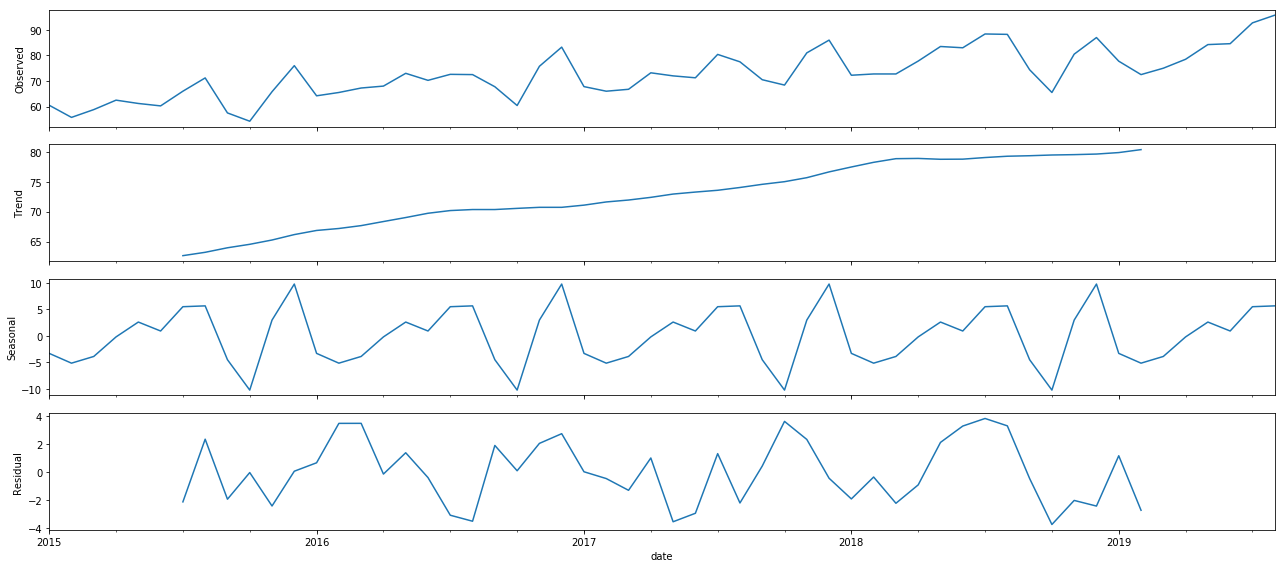

In [15]:
#2. Decompose and check for trend
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

1. Seasonal decomposition using moving average
2. Perfect Seasonality seen is because of seasonal adjustment factor. 
{“additive”, “multiplicative”}
3. For each months it is having average-correction-value
4. How Decomposition work ?
5. Moving average is used to remove noise, How ?

In [16]:
#3. Dickey fuller test for trend
import pandas as pd
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
dftest= adfuller(ts['Volume'], autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                  -1.507519
p-value                          0.529789
#Lags Used                      11.000000
#Number of Observations Used    44.000000
Critical Value (1%)             -3.588573
Critical Value (5%)             -2.929886
Critical Value (10%)            -2.603185
dtype: float64


1. **Diffrencing: In this method, we compute the difference of consecutive terms in the series.**

    train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
2. **Seasonal Diffrencing: we calculate the difference between an observation and a previous observation from the same season.**

    train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers']
.shift(n)
3. **Transformation: Log transformation**

    train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)

For Stationarity: p-value around 0.5 "Critical value" should be more than "Test statistic"

Ho: Series is not stationary "Fail to reject" Ho hypothesis = i.e accept Ho hypothesis(means, Series is not stationary).

1. p-value > 0.05
2. Test statistic > critical value

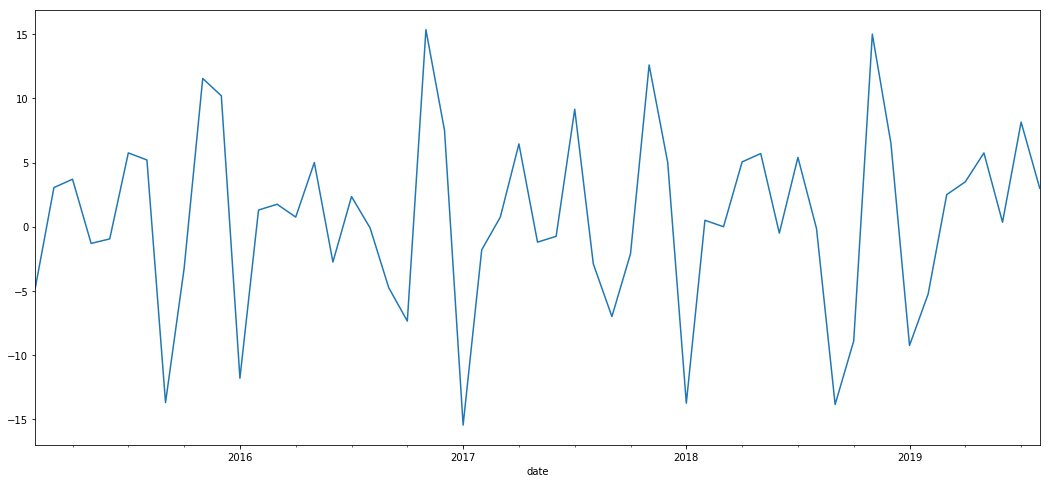

In [17]:
#Consecutive diffrencing
ts['diff'] = ts['Volume'] - ts['Volume'].shift(1)
ts.dropna(axis=0, inplace=True)
ts['diff'].plot()

In [18]:
#3. Dickey fuller test for trend after diffrencing
import pandas as pd
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
dftest= adfuller(ts['diff'], autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                  -5.643192
p-value                          0.000001
#Lags Used                      10.000000
#Number of Observations Used    44.000000
Critical Value (1%)             -3.588573
Critical Value (5%)             -2.929886
Critical Value (10%)            -2.603185
dtype: float64


In [0]:
#Seasonal diffrencing
# ts['seasonal_diff'] = ts['Volume'] - ts['Volume'].shift(12)
# ts.dropna(axis=0, inplace=True)
# ts['seasonal_diff'].plot()


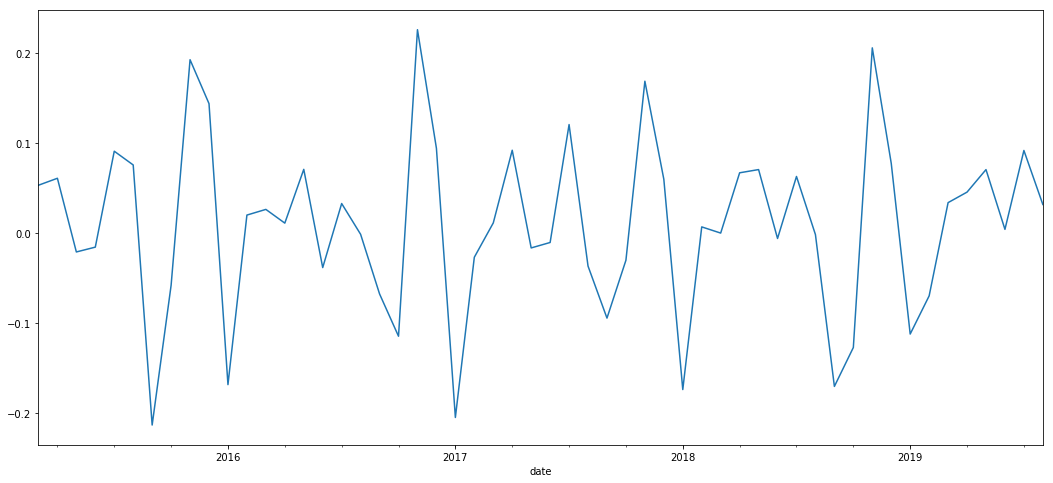

In [19]:
#Transformation
ts['Volume_log'] = np.log(ts['Volume'])
ts['Volume_log_diff'] = ts['Volume_log'] - ts['Volume_log'].shift(1)
ts['Volume_log_diff'].dropna().plot()

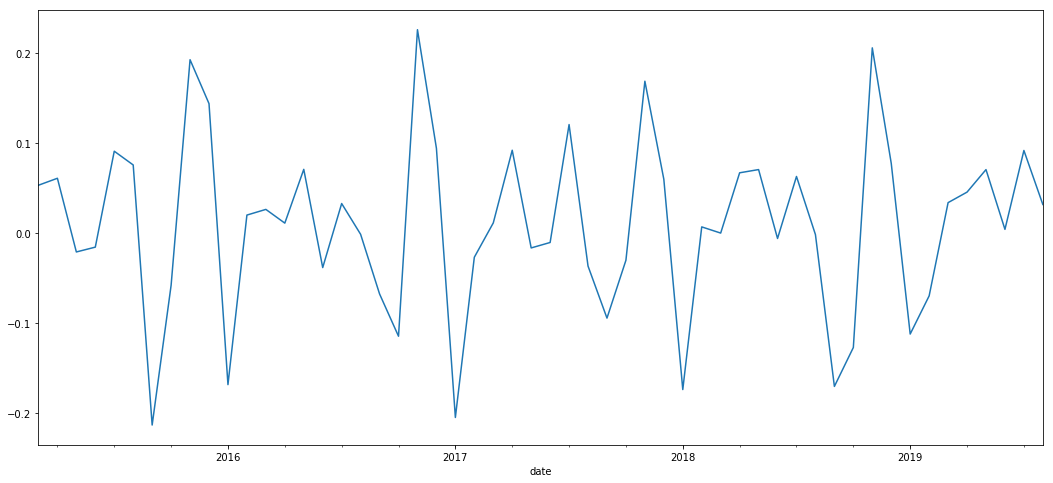

In [20]:
(np.log(ts['Volume']) - np.log(ts['Volume']).shift(1)).dropna().plot()

In [21]:
#3. Dickey fuller test for trend after diffrencing
import pandas as pd
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
dftest= adfuller((np.log(ts['Volume']) - np.log(ts['Volume']).shift(1)).dropna(), autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                  -4.895438
p-value                          0.000036
#Lags Used                      10.000000
#Number of Observations Used    43.000000
Critical Value (1%)             -3.592504
Critical Value (5%)             -2.931550
Critical Value (10%)            -2.604066
dtype: float64


Since, Test Statistic is "Less than" Critical value
and,   p-value < 0.05  hence we reject the Null hypothesis. 
Now, ts is stationary

In [22]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts['Volume'], nlags=24)
lag_pacf = pacf(ts['Volume'], nlags=24, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Note:Since 95.0% of a normally distributed population is within 1.96 (95% is within about 2) standard deviations of the mean

Text(0.5, 1.0, 'Autocorrelation Function')

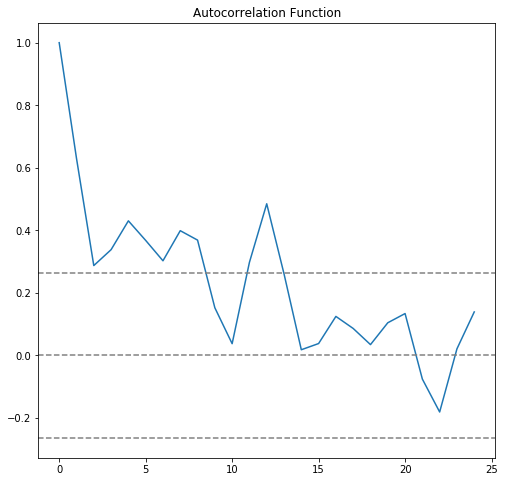

In [23]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts['Volume'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts['Volume'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [0]:
# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()

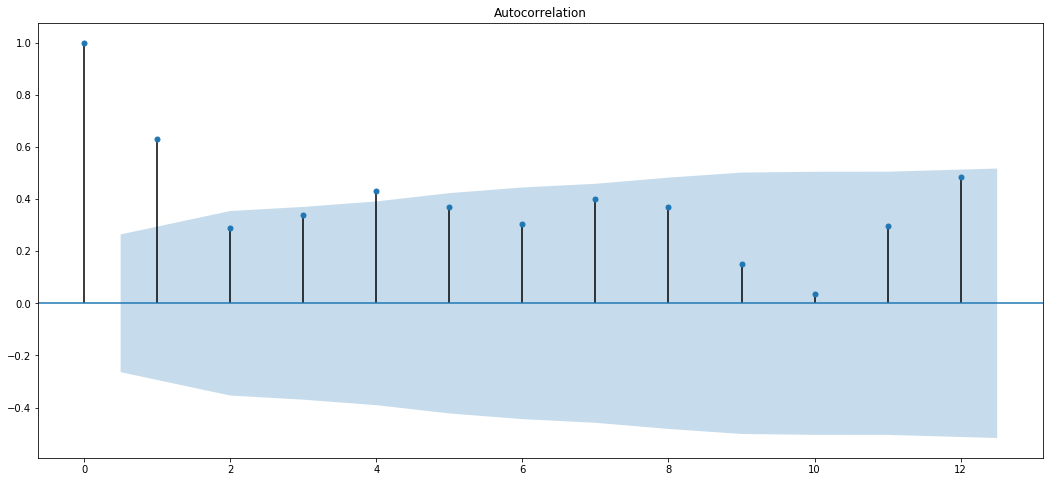

In [25]:
plot_acf(ts['Volume'], lags=12)
plt.show()

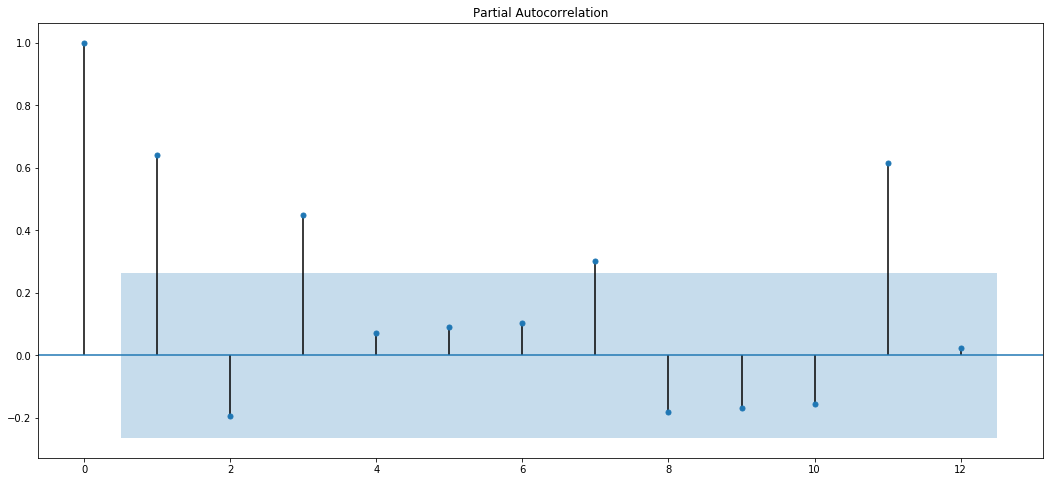

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts['Volume'], lags=12)
plt.show()

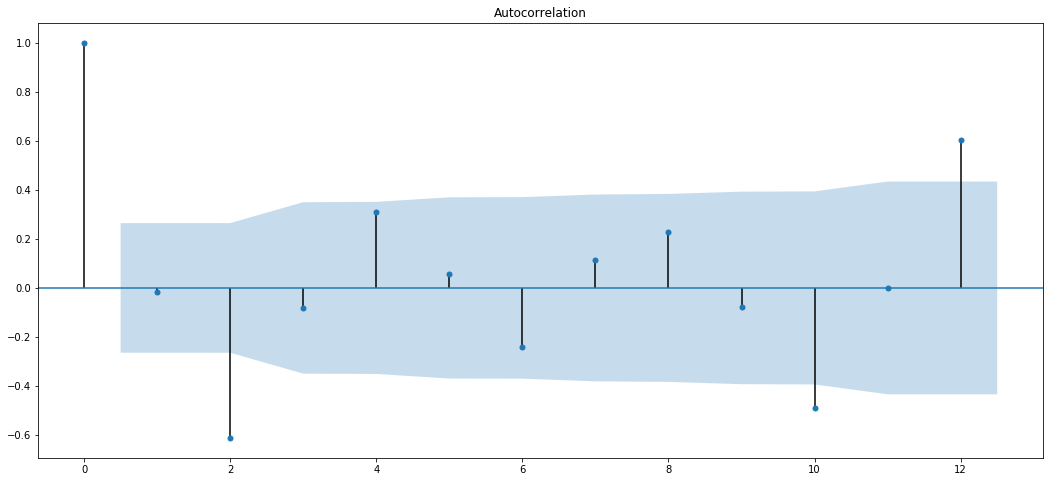

In [27]:
plot_acf(ts['diff'], lags=12)
plt.show()

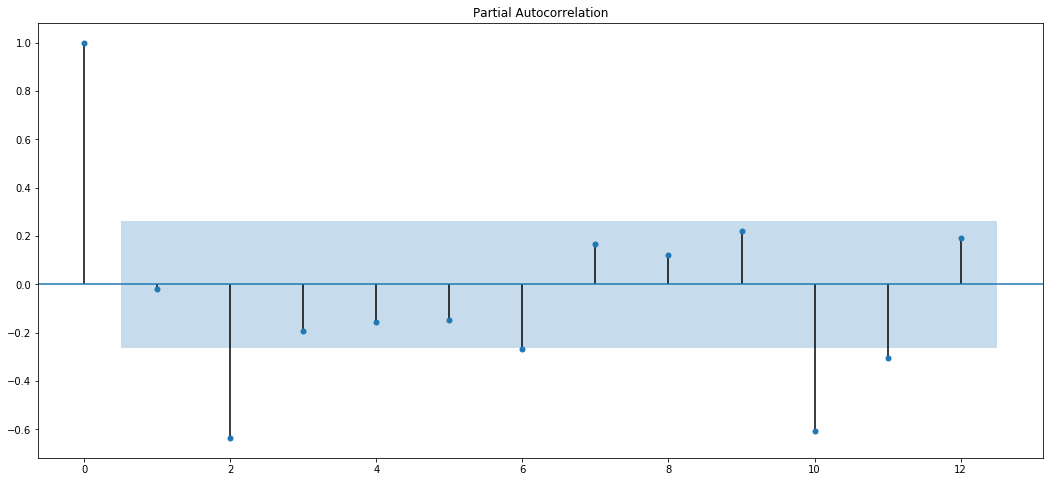

In [28]:
#acf on statinary time series

plot_pacf(ts['diff'], lags=12)
plt.show()

In [29]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 2.8MB/s 


**Auto Arima**
**choose optimal parameter:**  

start_p, max_p, start_q, max_q, d(Dickey_fuller)
seasonal (enabled/disabled)-- it find P,Q--- D(Canova-Hansen)                     
If "auto_arima" find stationarity issues, then                                  "ValueError" through suggetion: "stationarity- inducing measures be taken prior to re-fitting"
                        
m=no. of period in each season Minimise AIC, BIC
                        
Refrence: http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html





In [30]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(ts['Volume'], start_p=1, start_q=1, max_p=3, max_q=3, m=10,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a pac

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 10); AIC=314.990, BIC=323.911, Fit time=0.825 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 10); AIC=352.098, BIC=355.666, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 10); AIC=321.157, BIC=328.294, Fit time=0.226 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 10); AIC=325.128, BIC=332.265, Fit time=0.422 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 10); AIC=302.150, BIC=312.855, Fit time=0.956 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 10); AIC=309.888, BIC=318.809, Fit time=0.713 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 10); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 10); AIC=342.568, BIC=349.705, Fit time=0.353 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 10); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 10); AIC=306.6

In [31]:
stepwise_model

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 10), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [32]:
print(stepwise_model.aic())

293.6174081585202


In [0]:
#Train, test split
train = ts['Volume'].loc['2015-03-01':'2018-12-01']
test = ts['Volume'].loc['2019-01-01 ':]

In [34]:
#Training the model
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 10), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [0]:
#prediction
future_forecast = stepwise_model.predict(n_periods=8)

In [36]:
future_forecast

array([84.04969544, 83.52647543, 84.34784539, 80.81576767, 77.08429593,
       80.07677888, 84.33285537, 89.50657363])

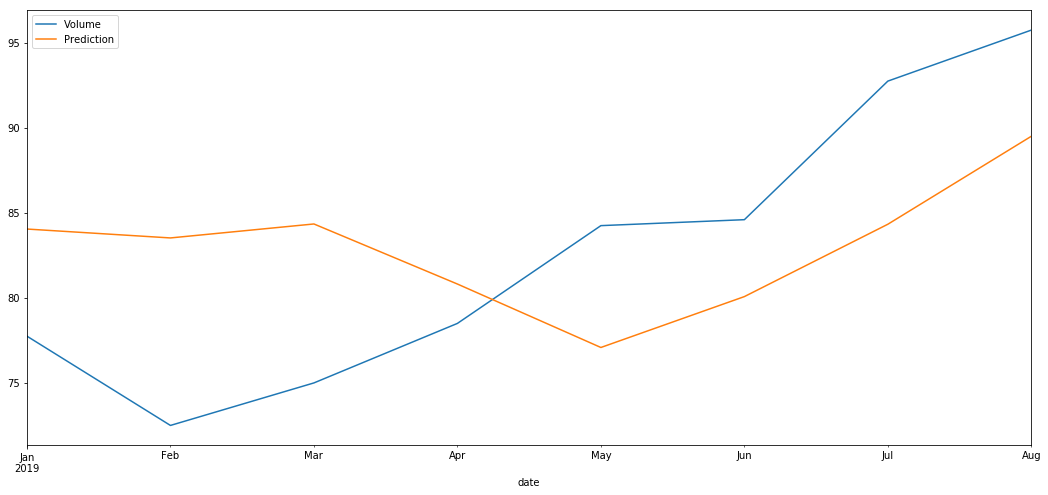

In [37]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [38]:
test

date
2019-01-01    77.75
2019-02-01    72.50
2019-03-01    75.00
2019-04-01    78.50
2019-05-01    84.25
2019-06-01    84.60
2019-07-01    92.75
2019-08-01    95.75
Freq: MS, Name: Volume, dtype: float64

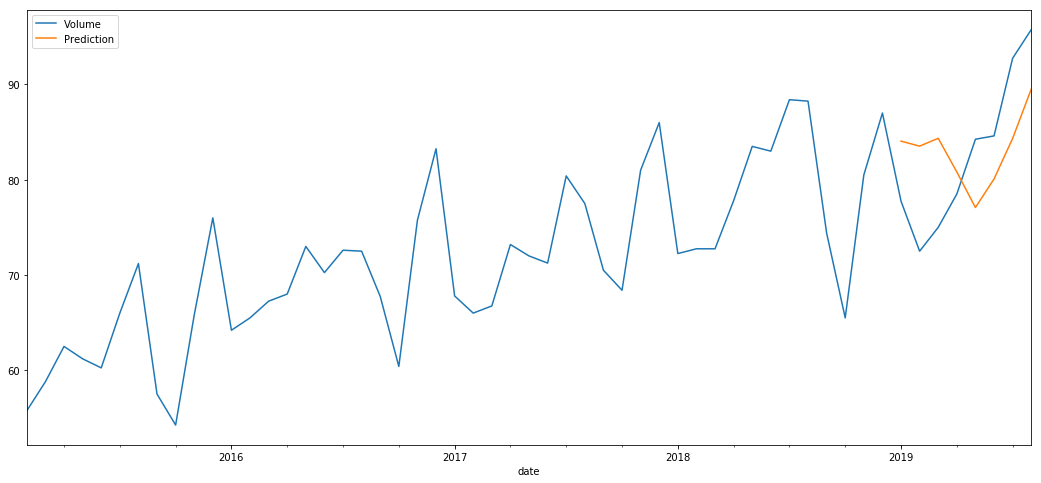

In [39]:
pd.concat([ts['Volume'],future_forecast],axis=1).plot()

In [0]:
index=pd.date_range(start='2019-09-01', end='2020-02-01', freq='MS') 

In [0]:
#Actual Prediction Fitting complete dataset(time_series)
stepwise_model.fit(ts['Volume'])
future_forecast_2 = stepwise_model.predict(n_periods=6)
future_forecast_2 = pd.DataFrame(future_forecast_2,index= index,columns=['Prediction'])

In [42]:
future_forecast_2

,Prediction
2019-09-01,78.430290
2019-10-01,77.819035
2019-11-01,78.553173
2019-12-01,84.284677
2020-01-01,91.563020
2020-02-01,89.261869


In [43]:
ts.index

DatetimeIndex(['2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype

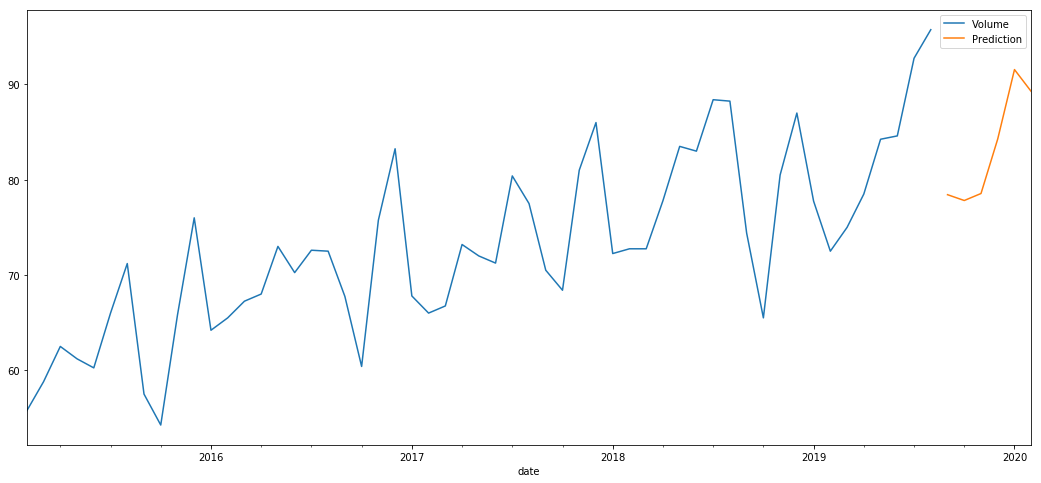

In [44]:
pd.concat([ts['Volume'],future_forecast_2],axis=1).plot()

**Residual analysis:**
A good forecasting method will yield residuals with the following properties:

1. The residuals are **uncorrelated**. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts. [Need to check ACF, all witheen 95% CI]

2. The residuals have **zero mean**. If the residuals have a mean other than zero, then the forecasts are biased.
3. The residuals have constant variance.
4. The residuals are normally distributed.

Any forecasting method that does not satisfy these properties can be improved.

Adjusting for bias is easy: if the residuals have mean m, then simply add m to all forecasts and the bias problem is solved

**Box-Pierce test:**

Q=(sum of the co-relation of each lag term) * no. of observation in ts

if each(lag term) co-relation is close to 0, the Q=small
if some(lag term) co-relation is large, then Q=large

In [0]:
#Residual Analysis
residuals = [test[i]-future_forecast_2['Prediction'][i] for i in range(len(future_forecast_2))]
residuals = pd.DataFrame(residuals)

In [46]:
future_forecast_2['Prediction']

2019-09-01    78.430290
2019-10-01    77.819035
2019-11-01    78.553173
2019-12-01    84.284677
2020-01-01    91.563020
2020-02-01    89.261869
Freq: MS, Name: Prediction, dtype: float64

In [47]:
residuals

,0
0,-0.680290
1,-5.319035
2,-3.553173
3,-5.784677
4,-7.313020
5,-4.661869
